# Creating Carbon Dioxide Removal (CDR) Forcing

In [1]:
from roms_tools import CDRPointSource, Grid

In [2]:
from datetime import datetime

In [3]:
grid = Grid(
    nx=100,
    ny=100,
    size_x=2500,
    size_y=2500,
    center_lon=-15,
    center_lat=65,
    rot=-30,
    N=100,
)

In [4]:
grid.ds

<xarray.Dataset> Size: 1MB
Dimensions:       (eta_rho: 102, xi_rho: 102, xi_u: 101, eta_v: 101,
                   eta_coarse: 52, xi_coarse: 52, s_rho: 100, s_w: 101)
Coordinates:
    lat_rho       (eta_rho, xi_rho) float64 83kB 57.13 57.12 ... 64.68 64.48
    lon_rho       (eta_rho, xi_rho) float64 83kB 315.7 316.1 ... 22.83 23.06
    lat_u         (eta_rho, xi_u) float64 82kB 57.13 57.11 57.1 ... 64.78 64.58
    lon_u         (eta_rho, xi_u) float64 82kB 315.9 316.3 316.7 ... 22.71 22.94
    lat_v         (eta_v, xi_rho) float64 82kB 57.24 57.23 57.22 ... 64.63 64.43
    lon_v         (eta_v, xi_rho) float64 82kB 315.7 316.1 316.5 ... 22.6 22.83
    lat_coarse    (eta_coarse, xi_coarse) float64 22kB 57.03 57.0 ... 64.43
    lon_coarse    (eta_coarse, xi_coarse) float64 22kB 315.5 316.3 ... 23.4
Dimensions without coordinates: eta_rho, xi_rho, xi_u, eta_v, eta_coarse,
                                xi_coarse, s_rho, s_w
Data variables: (12/15)
    angle         (eta_rho, xi_rho) float64 83kB -0.05973 -0.05973 ... -1.106
    f             (eta_rho, xi_rho) float64 83kB 0.0001222 ... 0.0001313
    pm            (eta_rho, xi_rho) float64 83kB 4.05e-05 4.05e-05 ... 4.05e-05
    pn            (eta_rho, xi_rho) float64 83kB 4.08e-05 4.08e-05 ... 4.08e-05
    spherical     |S1 1B b'T'
    mask_rho      (eta_rho, xi_rho) int32 42kB 1 1 1 1 1 1 1 1 ... 0 0 0 0 0 0 0
    ...            ...
    mask_coarse   (eta_coarse, xi_coarse) int32 11kB 1 1 1 1 1 1 ... 0 0 0 0 0 0
    h             (eta_rho, xi_rho) float64 83kB 3.262e+03 3.262e+03 ... 5.0 5.0
    sigma_r       (s_rho) float32 400B -0.995 -0.985 -0.975 ... -0.015 -0.005
    Cs_r          (s_rho) float32 400B -0.992 -0.9753 ... -8.89e-05 -9.874e-06
    sigma_w       (s_w) float32 404B -1.0 -0.99 -0.98 -0.97 ... -0.02 -0.01 0.0
    Cs_w          (s_w) float32 404B -1.0 -0.9837 -0.9667 ... -3.95e-05 0.0
Attributes:
    title:               ROMS grid created by ROMS-Tools
    roms_tools_version:  0.1.dev165
    size_x:              2500
    size_y:              2500
    center_lon:          -15
    center_lat:          65
    rot:                 -30
    topography_source:   ETOPO5
    hmin:                5.0
    theta_s:             5.0
    theta_b:             2.0
    hc:                  300.0

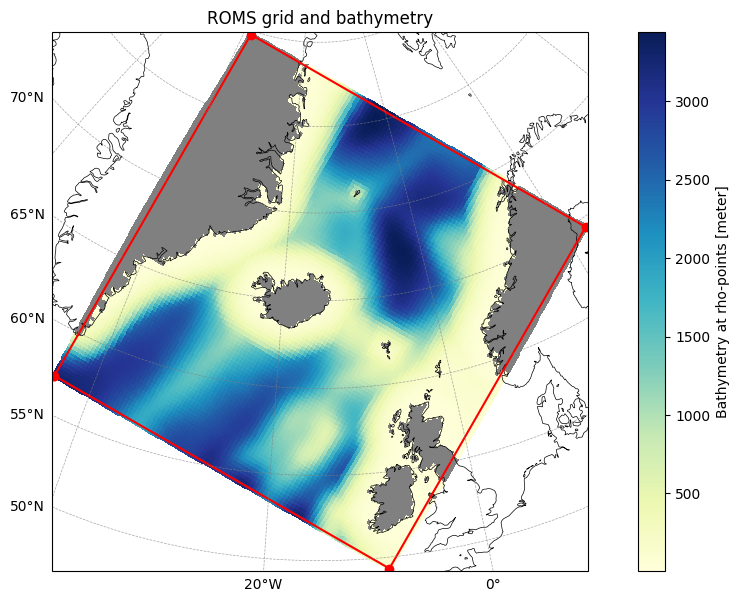

In [5]:
grid.plot()

In [6]:
cdr_forcing = CDRPointSource(
    grid=grid, start_time=datetime(2010, 1, 1), end_time=datetime(2012, 1, 1)
)

In [7]:
cdr_forcing.add_release(
    name="Iceland_field_trial_2010",
    lat=65.0,
    lon=-25,
    depth=10,
    volume_fluxes=1000,
    tracer_concentrations={"temp": 20.0, "salt": 1.0, "ALK": 2000.0},
)

In [8]:
cdr_forcing.ds

<xarray.Dataset> Size: 10kB
Dimensions:           (time: 2, ntracers: 34, ncdr: 1)
Coordinates:
  * time              (time) datetime64[ns] 16B 2010-01-01 2012-01-01
    tracer_name       (ntracers) <U11 1kB 'temp' 'salt' ... 'diazP' 'diazFe'
    tracer_unit       (ntracers) <U15 2kB 'degrees Celsius' 'PSU' ... 'mmol/m^3'
    tracer_long_name  (ntracers) <U43 6kB 'potential temperature' ... 'diazot...
    release_name      (ncdr) <U24 96B 'Iceland_field_trial_2010'
Dimensions without coordinates: ntracers, ncdr
Data variables:
    cdr_time          (time) float64 16B 3.653e+03 4.383e+03
    cdr_lon           (ncdr) float64 8B -25.0
    cdr_lat           (ncdr) float64 8B 65.0
    cdr_dep           (ncdr) float64 8B 10.0
    cdr_hsc           (ncdr) float64 8B 0.0
    cdr_vsc           (ncdr) float64 8B 0.0
    cdr_volume        (time, ncdr) float64 16B 1e+03 1e+03
    cdr_tracer        (time, ntracers, ncdr) float64 544B 20.0 1.0 ... 1.5e-06

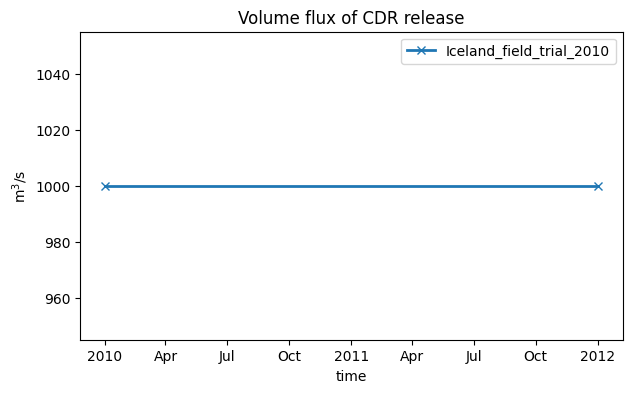

In [9]:
cdr_forcing.plot_volume_flux()

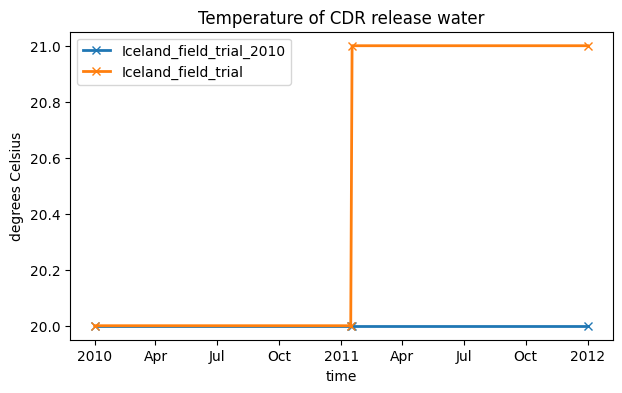

In [14]:
cdr_forcing.plot_tracer_concentration("temp")

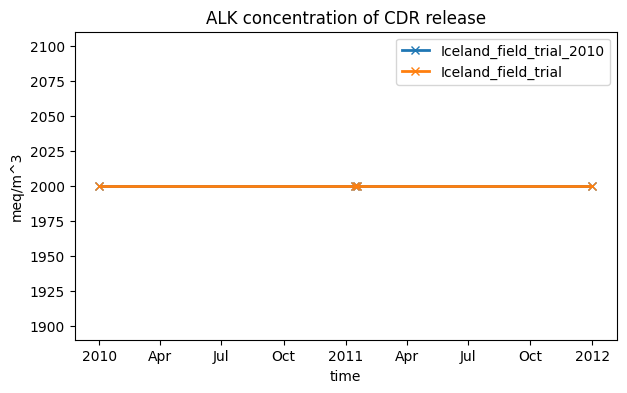

In [15]:
cdr_forcing.plot_tracer_concentration("ALK")

In [13]:
cdr_forcing.add_release(
    name="Iceland_field_trial",
    lat=70,
    lon=-20,
    depth=10,
    times=[datetime(2011, 1, 15), datetime(2011, 1, 17)],
    volume_fluxes=1300,
    tracer_concentrations={"temp": [20.0, 21.0], "salt": 1.0, "ALK": 2000.0},
)

In [14]:
cdr_forcing.ds.cdr_volume

<xarray.DataArray 'cdr_volume' (time: 4, ncdr: 2)> Size: 64B
array([[1000., 1300.],
       [1000., 1300.],
       [1000., 1300.],
       [1000., 1300.]])
Coordinates:
  * time          (time) datetime64[ns] 32B 2010-01-01 2011-01-15 ... 2012-01-01
    release_name  (ncdr) <U24 192B 'Iceland_field_trial_2010' 'Iceland_field_...
Dimensions without coordinates: ncdr

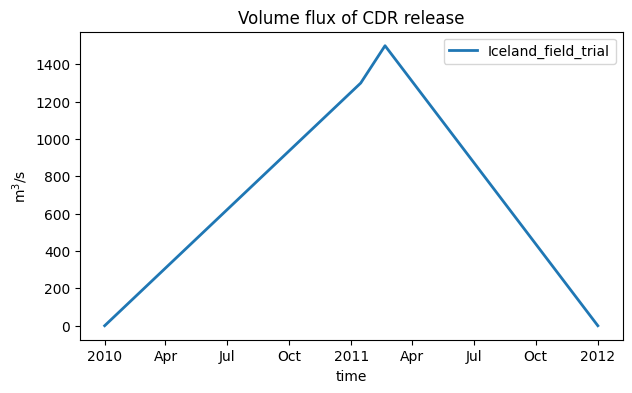

In [26]:
cdr_forcing.plot("cdr_volume")

In [12]:
cdr_forcing.releases

{'_tracer_metadata': {'temp': {'units': 'degrees Celsius',
   'long_name': 'potential temperature'},
  'salt': {'units': 'PSU', 'long_name': 'salinity'},
  'PO4': {'units': 'mmol/m^3', 'long_name': 'dissolved inorganic phosphate'},
  'NO3': {'units': 'mmol/m^3', 'long_name': 'dissolved inorganic nitrate'},
  'SiO3': {'units': 'mmol/m^3', 'long_name': 'dissolved inorganic silicate'},
  'NH4': {'units': 'mmol/m^3', 'long_name': 'dissolved ammonia'},
  'Fe': {'units': 'mmol/m^3', 'long_name': 'dissolved inorganic iron'},
  'Lig': {'units': 'mmol/m^3', 'long_name': 'iron binding ligand'},
  'O2': {'units': 'mmol/m^3', 'long_name': 'dissolved oxygen'},
  'DIC': {'units': 'mmol/m^3', 'long_name': 'dissolved inorganic carbon'},
  'DIC_ALT_CO2': {'units': 'mmol/m^3',
   'long_name': 'dissolved inorganic carbon, alternative CO2'},
  'ALK': {'units': 'meq/m^3', 'long_name': 'alkalinity'},
  'ALK_ALT_CO2': {'units': 'meq/m^3',
   'long_name': 'alkalinity, alternative CO2'},
  'DOC': {'units': 'mm

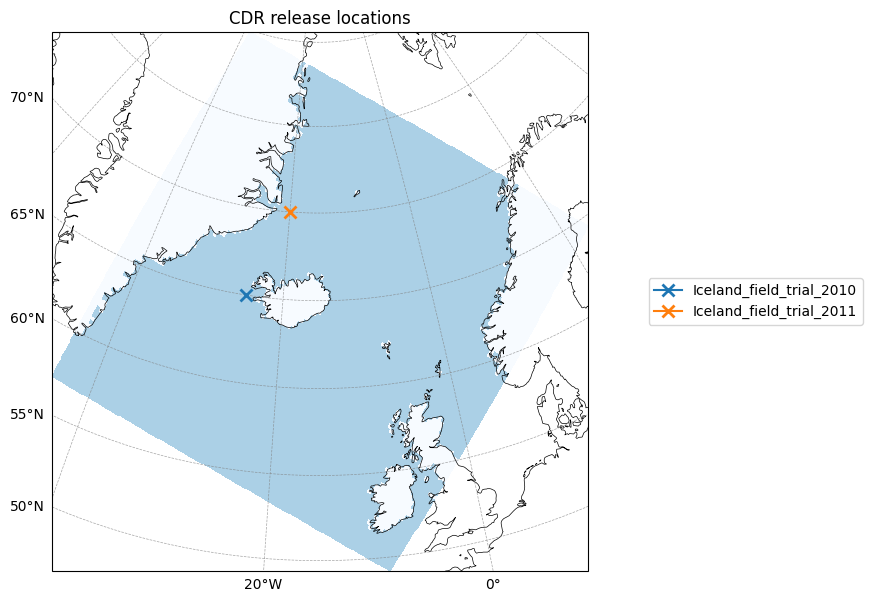

In [13]:
cdr_forcing.plot_location_top()

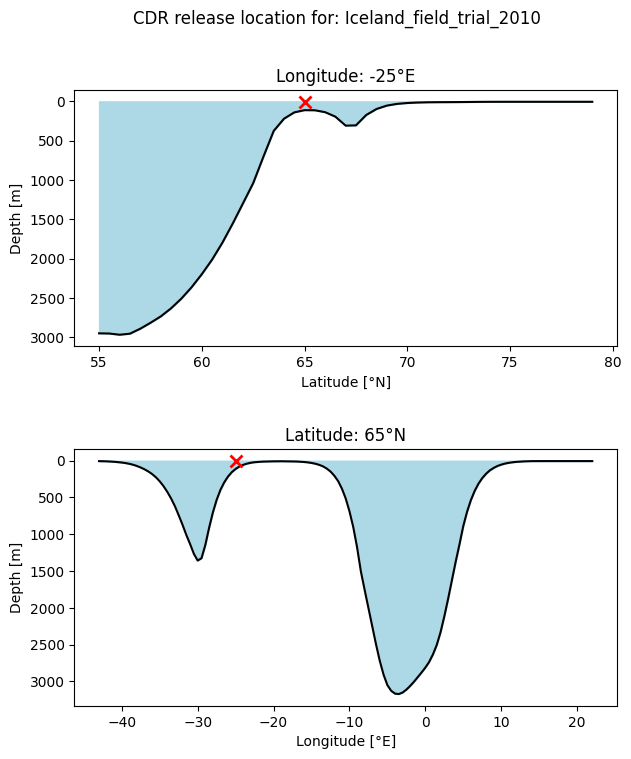

In [15]:
cdr_forcing.plot_location_side(release="Iceland_field_trial_2010")

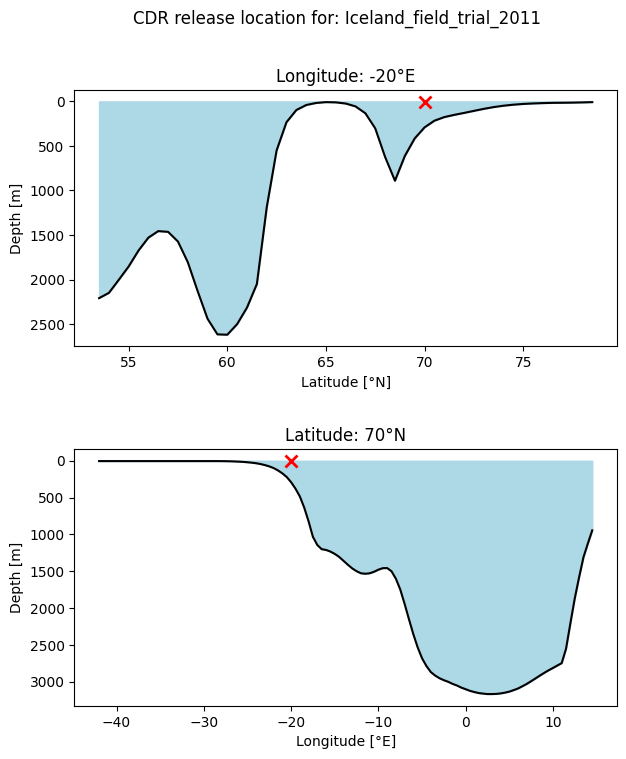

In [16]:
cdr_forcing.plot_location_side(release="Iceland_field_trial_2011")